# Westbound Traffic on the I-94 Interstate

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. John Hogue made the dataset available, and it can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [2]:
import pandas as pd
import numpy as np


In [3]:
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
metro.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
metro.tail()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
metro.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 48204 rows and 9 columns with no null entries. The datatypes of each column also seems to line up with what we expect from the documentation. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.
Below is a description of all the columns from the documenatation: 

- holiday - Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp  - Numeric Average temp in kelvin
- rain_1h - Numeric Amount in mm of rain that occurred in the hour
- snow_1h - Numeric Amount in mm of snow that occurred in the hour
- clouds_all - Numeric Percentage of cloud cover
- weather_main - Categorical Short textual description of the current weather
- weather_description - Categorical Longer textual description of the current weather
- date_time - DateTime Hour of the data collected in local CST time
- traffic_volume - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. As such, we should avoid generalizing our results for the entire I-94 highway.

## Analyzing Traffic Volume

First, let's examine traffic volume.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


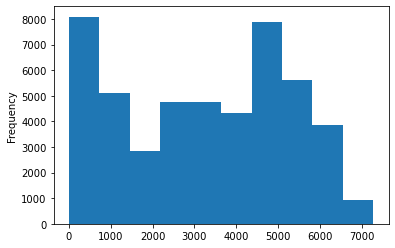

In [7]:
metro['traffic_volume'].plot.hist()
plt.show()


In [8]:
metro['traffic_volume'].describe()


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

During the data collection, traffic volume varied between 0 and 7,280 vehicles per hour with an average of 3,380. 

* The lower volume times (25% quartile - 1,193 vehicles per hour or less) may occur during nighttime or construction.

* The higher volume times (4,933 vehicles or more which is more than four times the lower volume times) probably occur during peak traffic times. 

It is worth exploring this further. As we may not know exactly when there is construction or a delay due to unforseen circumstances, let's observe daytime vs nighttime.

## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [9]:
metro['date_time'] = pd.to_datetime(metro['date_time'])


In [10]:
daytime = metro.copy()[(metro['date_time'].dt.hour >= 7)
                       & (metro['date_time'].dt.hour < 19)]

nighttime = metro.copy()[(metro['date_time'].dt.hour >= 19)
                         | (metro['date_time'].dt.hour < 7)]


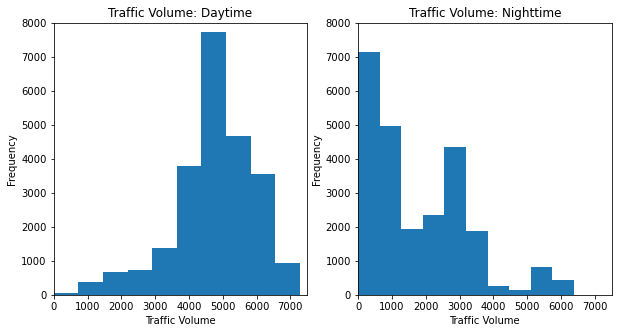

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.xlim(0, 7500)
plt.ylabel('Frequency')
plt.ylim(0, 8000)
plt.title('Traffic Volume: Daytime')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.xlim(0, 7500)
plt.ylabel('Frequency')
plt.ylim(0, 8000)
plt.title('Traffic Volume: Nighttime')
plt.show()


In [12]:
daytime['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
nighttime['traffic_volume'].describe()


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram showing daytime traffic volume is skewed left, meaning it has fewer values in the lower frequencies. This is opposed to the histogram showing nighttime traffic volume which is skewed right. This indicates that traffic volumes are higher during the daytime.

One can observe this in the data description of day and night traffic volumes. Nighttime has an average traffic volume of 1785 while the average volume during the day is 4762 vehicles per hour, over double that of the nighttime.

As our goal is to find indicators of heavy traffic, we will continue to focus on the `daytime` data.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

### By Month

First, we will observe monthly data.

In [14]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

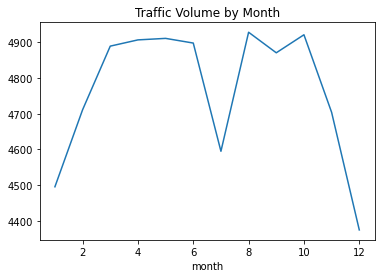

In [15]:
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume by Month')
plt.show()


The line graph shows how the average volume changes by month. One observes two clear dips coinciding with December to March, and July. The December to March dip could be explained with the colder winter months, but the July dip is worth exploring further.

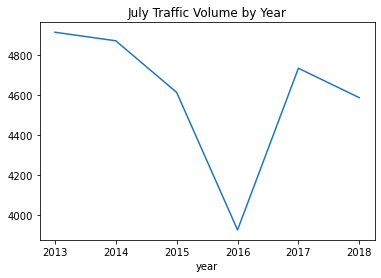

In [16]:
daytime['year'] = daytime['date_time'].dt.year
july = daytime[daytime['month'] == 7]
july.groupby('year').mean()['traffic_volume'].plot.line()
plt.title('July Traffic Volume by Year')
plt.show()


It seems that this dip is unique for July as usually the traffic volume during this month is just as high as the other warmer months(March - October)

### By Day

Next, let's look at daily data.

In [17]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']
# 0 is Monday, 6 is Sunday


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

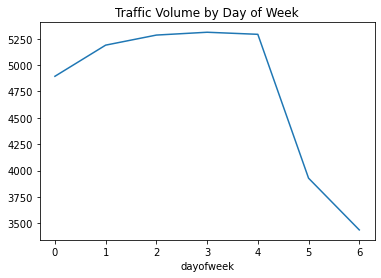

In [18]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic Volume by Day of Week')
plt.show()


There is clearly a stark difference between the weekday volume and weekend volume. As weekdays are the usual business days, less business is done on weekends people have less driving around to do leading to less traffic.

### By Time

Now, we look at time of day data. As the traffic volume is much lighter on weekends, we will split the data to two categories; business days, and weekend.

In [19]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4]  # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5]  # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])


hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


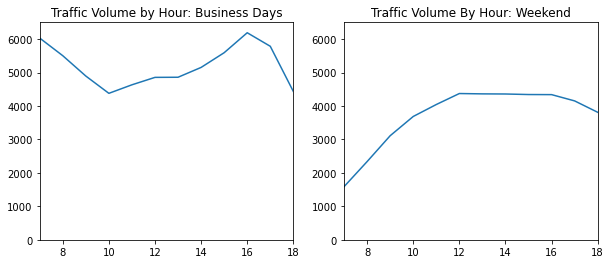

In [20]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic Volume by Hour: Business Days')
plt.xlim(7, 18)
plt.ylim(0, 6500)

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume By Hour: Weekend')
plt.xlim(7, 18)
plt.ylim(0, 6500)

plt.show()


The line graps for business days shows some expected results. Morning "rush hour" occurs at 7am as people head to work, there is less traffic throughout the day(minimum traffic volume during a business day, at about 10am, coincides with maximum traffic volume on a weekend day, about midday). Evening "rush hour" occurs at about 4pm on a weekday as commuters depart offices and business engagements.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [24]:
daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  year                 23877 non-null  int64         
 11  dayofweek            23877 non-null  int64         
 12  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3

In [29]:
daytime.corr()['traffic_volume'][['temp', 'snow_1h', 'clouds_all']]

temp          0.128317
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

We can see that the temperature column has the highest correlation with the traffic volume. Let us observe this graphically.

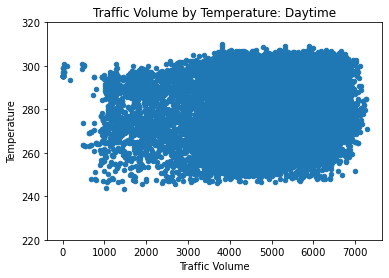

In [33]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.ylim(220,320) #two incorrect reading of 0k recorded, adding the limit makes it easier to read
plt.title('Traffic Volume by Temperature: Daytime')
plt.show()

This spread shows us that temperature is not a solid contributer to heavy traffic, as the statistically insignificant correlation coefficent displayed earlier.

### Weather Differences

Since we did not find any reliable indicator of heavy traffic using the numerical weather columns, we will examine the more categorical ones now, namely `weather_main` and `weather_description`.

In [35]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

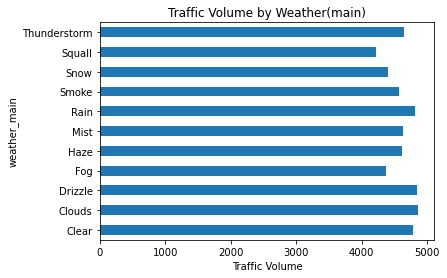

In [37]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic Volume by Weather(main)')
plt.xlabel('Traffic Volume')
plt.show()

The traffic volume never exceeds 5,000 vehicles per hour and none of the weather indicators coincide with much higher traffic volumes than the average.

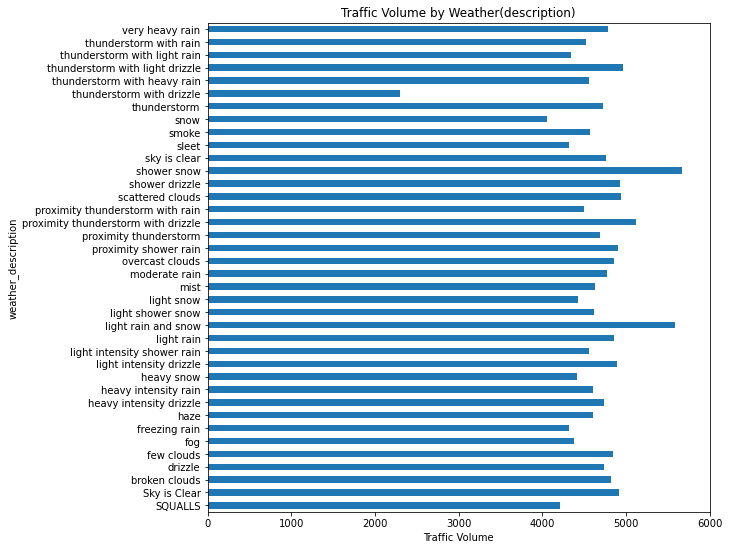

In [41]:
by_weather_description['traffic_volume'].plot.barh(figsize=(9,9))
plt.xlabel('Traffic Volume')
plt.xlim(0,6000)
plt.title('Traffic Volume by Weather(description)')
plt.show()

This barplot is very useful as it shows from all the weather descriptions, only three coincide with vehicular traffic over 5,000:
- light rain and snow
- shower snow
- Proximity thunderstorm with drizzle

These may be the only clear weather indicators to increase traffic using the data we have available. With that, the weather indicators do not line up with our heaviest traffic we observed earlier so the effect is not very marked. These weather conditions cause vehicles to drive more slowly which leads to traffic increases.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators:
    - The traffic is usually heavier during warmer months (March–October) compared to the winter months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - Traffic is much heavier during daytime hours as opposed to nighttimes hours.
    - On business days, the rush hours are around 7 and 16.


* Weather indicators:
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle
